In [1]:
import math
import matplotlib.pyplot as plt
import random

## 🎲 Método cuadrado–mitad

El **método cuadrado–mitad** es un generador clásico de números pseudoaleatorios.

### 📌 Idea básica

Sea $x_0$ una semilla con $n$ dígitos. El procedimiento iterativo es:

1. Elevar la semilla al cuadrado.
2. Escribir $x_k^2$ con al menos $2n$ dígitos (agregando ceros a la izquierda si es necesario).
3. Tomar los $n$ dígitos centrales del resultado.
4. Definir ese valor como la nueva semilla $x_{k+1}$.

De forma general,

$$
x_{k+1} = M_n\!\left(x_k^2\right),
$$

donde $M_n(\cdot)$ denota la operación de extraer los $n$ dígitn}, \qquad 0 \le u_k < 1.
$$

---

### ⚠️ Observación

Aunque es sencillo de implementar, este método puede caer.almente de interés histórico o educativo.


In [21]:
def cuadrado_mitad(seed: int, pasos: int):
    """
    Generador pseudoaleatorio usando el método cuadrado–mitad.

    Parámetros
    ----------
    seed : int
        Semilla inicial x0 .
    pasos : int
        Cantidad de números a generar.
    Retorna
    -------
    list
        Lista con los números generados.
    """

    x = seed
    resultados = []
    n = len(str(seed))
    i = 0
    while i < pasos:
        # 1) elevar al cuadrado
        cuadrado = x**2

        # 2) convertir a string con al menos 2n dígitos
        s = str(cuadrado).zfill(2 * n)

        # 3) extraer los n dígitos centrales
        inicio = (len(s) - n) //  2
        medio = s[inicio:inicio + n]

        # 4) nueva semilla
        x = int(medio)

        # 5) guardar resultado
        
        resultados.append(x)
        i = i+1 

    return resultados




[5227, 3215, 3362, 3030, 1809, 2724, 4201, 6484, 422, 1780]


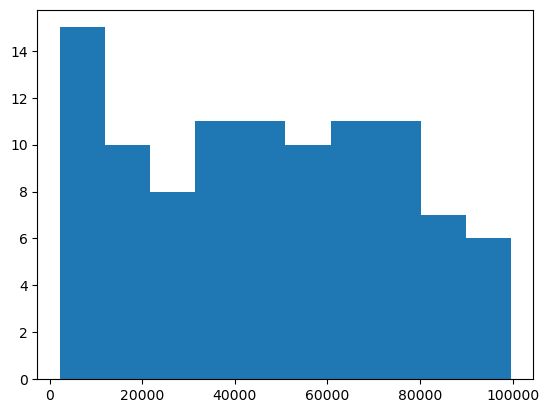

In [63]:
# ✅ Ejemplo de uso
nums = cuadrado_mitad(seed=24546, pasos=100)
plt.hist(nums)
plt.show()

## 🎲 Generador lineal congruencial (GLC)

El **generador lineal congruencial** es uno de los métodos más clásicos para producir números pseudoaleatorios.

### 📌 Definición

La sucesión se define mediante la recurrencia

$$
x_{n+1} = \mathrm{glc}(x_n) = a(x_n + c) \; \text{mod} \; m,
$$

y los números pseudoaleatorios normalizados se obtienen como

$$
u_n = \mathrm{gglc}(x_n) = \frac{x_n}{m}.
$$

donde:

- $a$ : multiplicador,
- $c$ : incremento,
- $m$ : módulo,
- $x_0$ : semilla inicial.

---

### ⚙️ Parámetros de Park y Miller (1988)

Park y Miller sugirieron la siguiente elección de parámetros:

$$
m = 2^{31} - 1, \qquad a = 7^5, \qquad c = 0.
$$

Este caso particular se conoce como el **minimal standard generator** y es ampliamente usado como referencia histórica en simulación.


In [30]:
class GLC:
    """
    Generador Lineal Congruencial (Park & Miller por default)

    x_{n+1} = a (x_n + c) mod m
    u_n = x_n / m
    """

    def __init__(self, m=2**31 - 1, a=7**5, c=0, seed=1):
        """
        Parámetros
        ----------
        m : int
            Módulo
        a : int
            Multiplicador
        c : int
            Incremento
        seed : int
            Semilla inicial
        """
        self.m = m
        self.a = a
        self.c = c
        self.state = seed

    # ---------------------------------------------------
    # Genera un solo número
    # ---------------------------------------------------
    def _next(self):
        self.state = (self.a * (self.state + self.c)) % self.m
        return self.state / self.m

    # ---------------------------------------------------
    # Genera una muestra de tamaño n
    # ---------------------------------------------------
    def sample(self, n):
        """
        Genera n números pseudoaleatorios en (0,1).
        """
        return [self._next() for _ in range(n)]

    # ---------------------------------------------------
    # Histograma de una muestra
    # ---------------------------------------------------
    def histogram(self, n, bins=30):
        """
        Genera n números y grafica su histograma.
        """
        data = self.sample(n)

        plt.figure()
        plt.hist(data, bins=bins, density=True)
        plt.title("Histograma - Generador Lineal Congruencial")
        plt.xlabel("u")
        plt.ylabel("Frecuencia")
        plt.show()

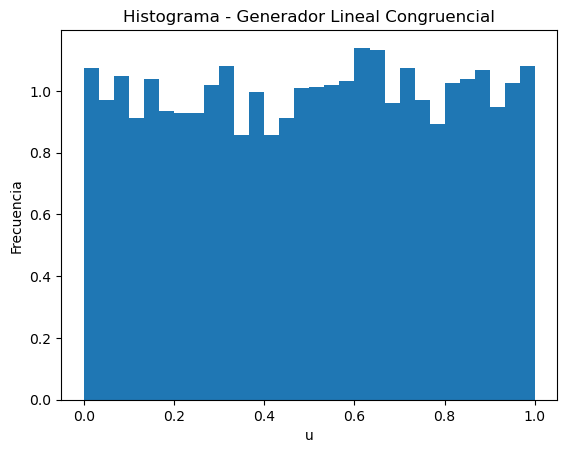

In [40]:
glc = GLC(seed=1092)

muestra = glc.sample(1000)

glc.histogram(5000)

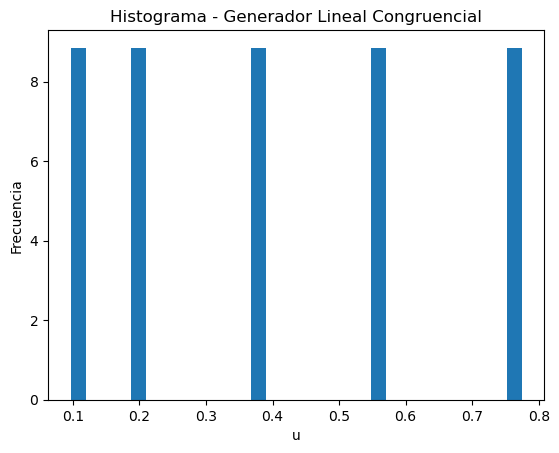

In [50]:
glc = GLC(seed=15672,a=2**9,c=0,m=2**5-1)

muestra = glc.sample(1000)

glc.histogram(5000)

In [75]:
#Generar números uniformes
random.seed(23)

for _ in range(10):
    print(random.random())

0.9248652516259452
0.9486057779931771
0.8924333440485793
0.08355067683068362
0.5920272268857353
0.4237474082349614
0.5300880101180064
0.13030294124748054
0.1919971575392927
0.444573573873013
